- 참고해볼만한 사이트  : https://www.kaggle.com/andreshg/timeseries-analysis-a-complete-guide

In [1]:
import glob
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams["font.family"] = 'NanumGothic'

### train 파일 EDA

In [3]:
train = pd.read_csv(os.path.join('Data', 'public_data', 'train.csv'))

In [4]:
train.head()

date   요일  배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  무_가격(원/kg)  \
0  2016-01-01  금요일         0.0          0.0        0.0         0.0   
1  2016-01-02  토요일     80860.0        329.0    80272.0       360.0   
2  2016-01-03  일요일         0.0          0.0        0.0         0.0   
3  2016-01-04  월요일   1422742.5        478.0  1699653.7       382.0   
4  2016-01-05  화요일   1167241.0        442.0  1423482.3       422.0   

   양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  ...  청상추_거래량(kg)  \
0         0.0          0.0          0.0           0.0  ...          0.0   
1    122787.5       1281.0          3.0       11000.0  ...       5125.0   
2         0.0          0.0          0.0           0.0  ...          0.0   
3   2315079.0       1235.0        699.0        4464.0  ...      38525.5   
4   2092960.1       1213.0       1112.6        4342.0  ...      32615.0   

   청상추_가격(원/kg)  백다다기_거래량(kg)  백다다기_가격(원/kg)  애호박_거래량(kg)  애호박_가격(원/kg)  \
0           0.0           0.0            0.0          0.0           0.0   
1        9235.0         434.0         2109.0      19159.0        2414.0   
2           0.0           0.0            0.0          0.0           0.0   
3        7631.0      500702.0         2046.0     620539.0        2018.0   
4        6926.0      147638.0         2268.0     231958.0        2178.0   

   캠벨얼리_거래량(kg)  캠벨얼리_가격(원/kg)  샤인마스캇_거래량(kg)  샤인마스캇_가격(원/kg)  
0           0.0            0.0            0.0             0.0  
1         880.0         2014.0            0.0             0.0  
2           0.0            0.0            0.0             0.0  
3        2703.8         3885.0            0.0             0.0  
4        8810.0         2853.0            0.0             0.0  

[5 rows x 44 columns]

In [6]:
# 정보 확인
# null 값 없음
# 모델 학습할 때 요일 변환 필요
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1733 non-null   object 
 1   요일              1733 non-null   object 
 2   배추_거래량(kg)      1733 non-null   float64
 3   배추_가격(원/kg)     1733 non-null   float64
 4   무_거래량(kg)       1733 non-null   float64
 5   무_가격(원/kg)      1733 non-null   float64
 6   양파_거래량(kg)      1733 non-null   float64
 7   양파_가격(원/kg)     1733 non-null   float64
 8   건고추_거래량(kg)     1733 non-null   float64
 9   건고추_가격(원/kg)    1733 non-null   float64
 10  마늘_거래량(kg)      1733 non-null   float64
 11  마늘_가격(원/kg)     1733 non-null   float64
 12  대파_거래량(kg)      1733 non-null   float64
 13  대파_가격(원/kg)     1733 non-null   float64
 14  얼갈이배추_거래량(kg)   1733 non-null   float64
 15  얼갈이배추_가격(원/kg)  1733 non-null   float64
 16  양배추_거래량(kg)     1733 non-null   float64
 17  양배추_가격(원/kg)    1733 non-null   f

### (1) 추세 확인

- 거래량과 가격의 단위가 달라 두 변수간 비교 어려움 (거래량과 가격에 log함수 적용)
- 계절성이 반영된 농산물 다수 존재
- 농산물 가격은 일정해보이지만, 가격만 plotting 하였을 때 변동성이 보임
- 청상추의 가격이 오르면 거래량이 낮아짐을 볼 수 있음
- 농산물 모두 계절적 영향을 많이 받는것으로 보임
- 농산물끼리는 서로 관련이 없을것이라고 가정함

In [7]:
col_list = list(train.columns[2:])

In [8]:
parameters = {'axes.labelsize': 25,
          'axes.titlesize': 30,
             'legend.fontsize': 16}
plt.rcParams.update(parameters)

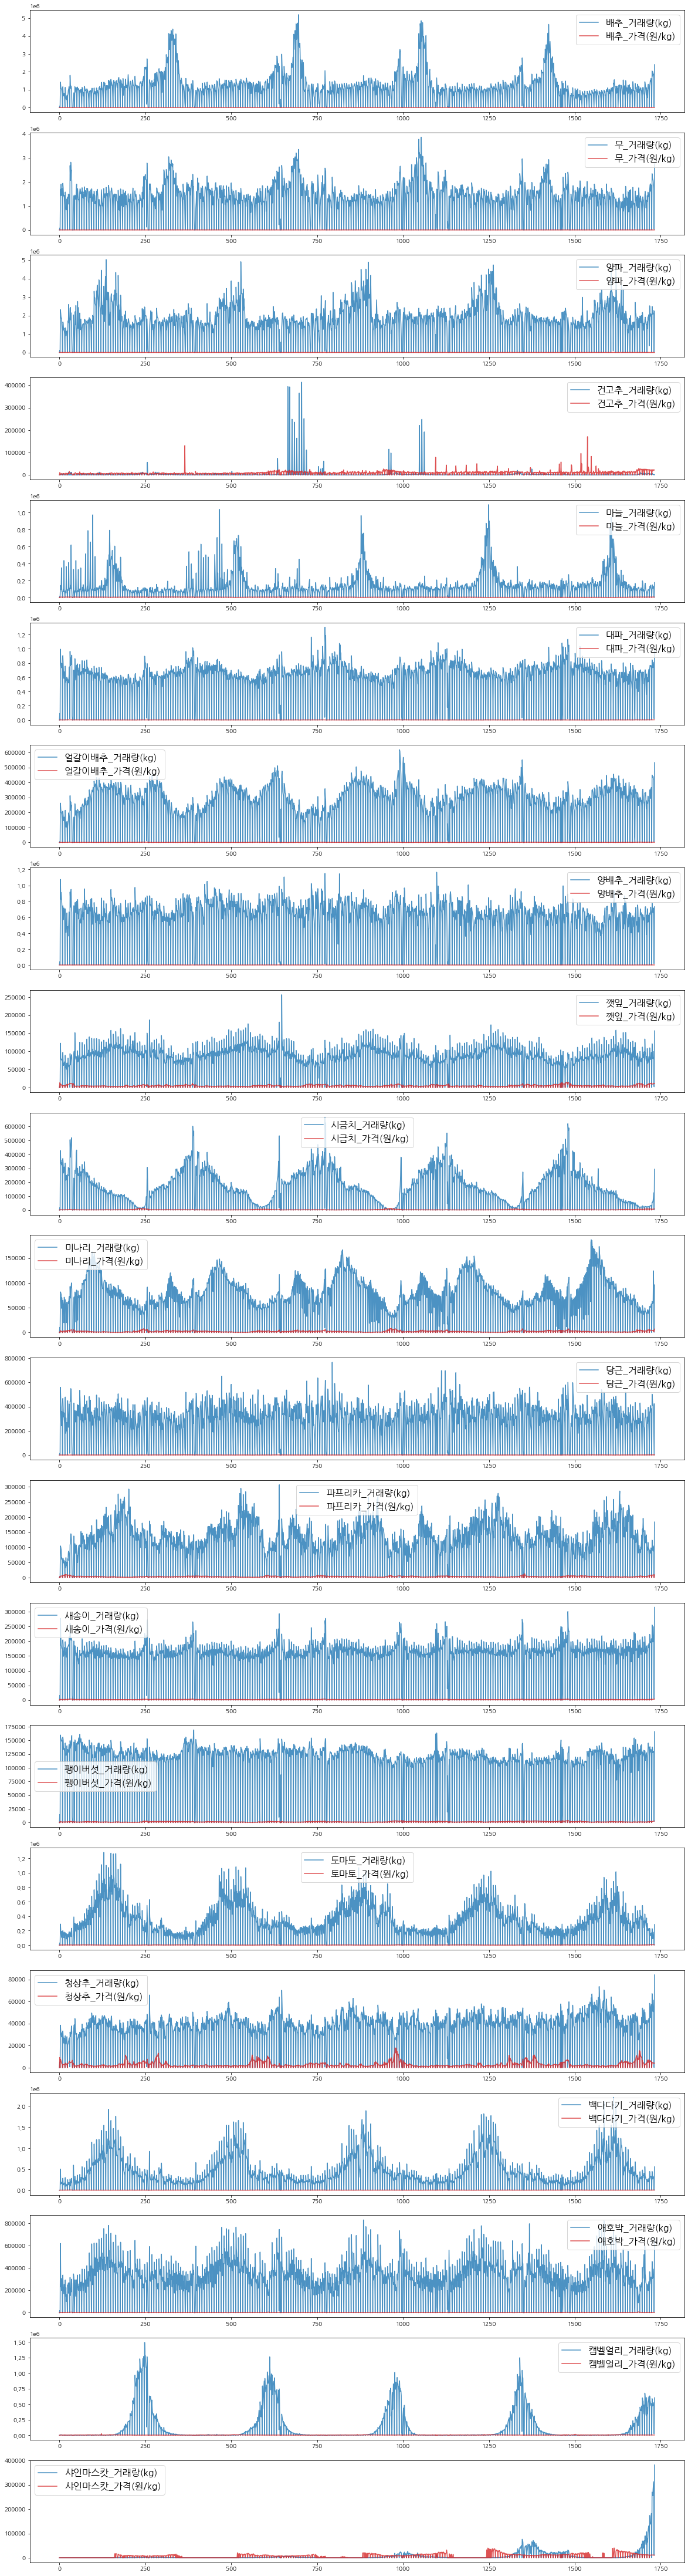

In [9]:
fig,ax = plt.subplots(21,1,figsize=(20,80))
alpha = 0.8

n = 0
for i in range(21):
    
    ax[i].plot(train[str(col_list[n])].values, color = 'tab:blue',alpha = alpha)
    ax[i].plot(train[str(col_list[n+1])].values, color = 'tab:red',alpha = alpha)
    ax[i].legend([str(col_list[n]), str(col_list[n+1])])
    i += 1
    n += 2 

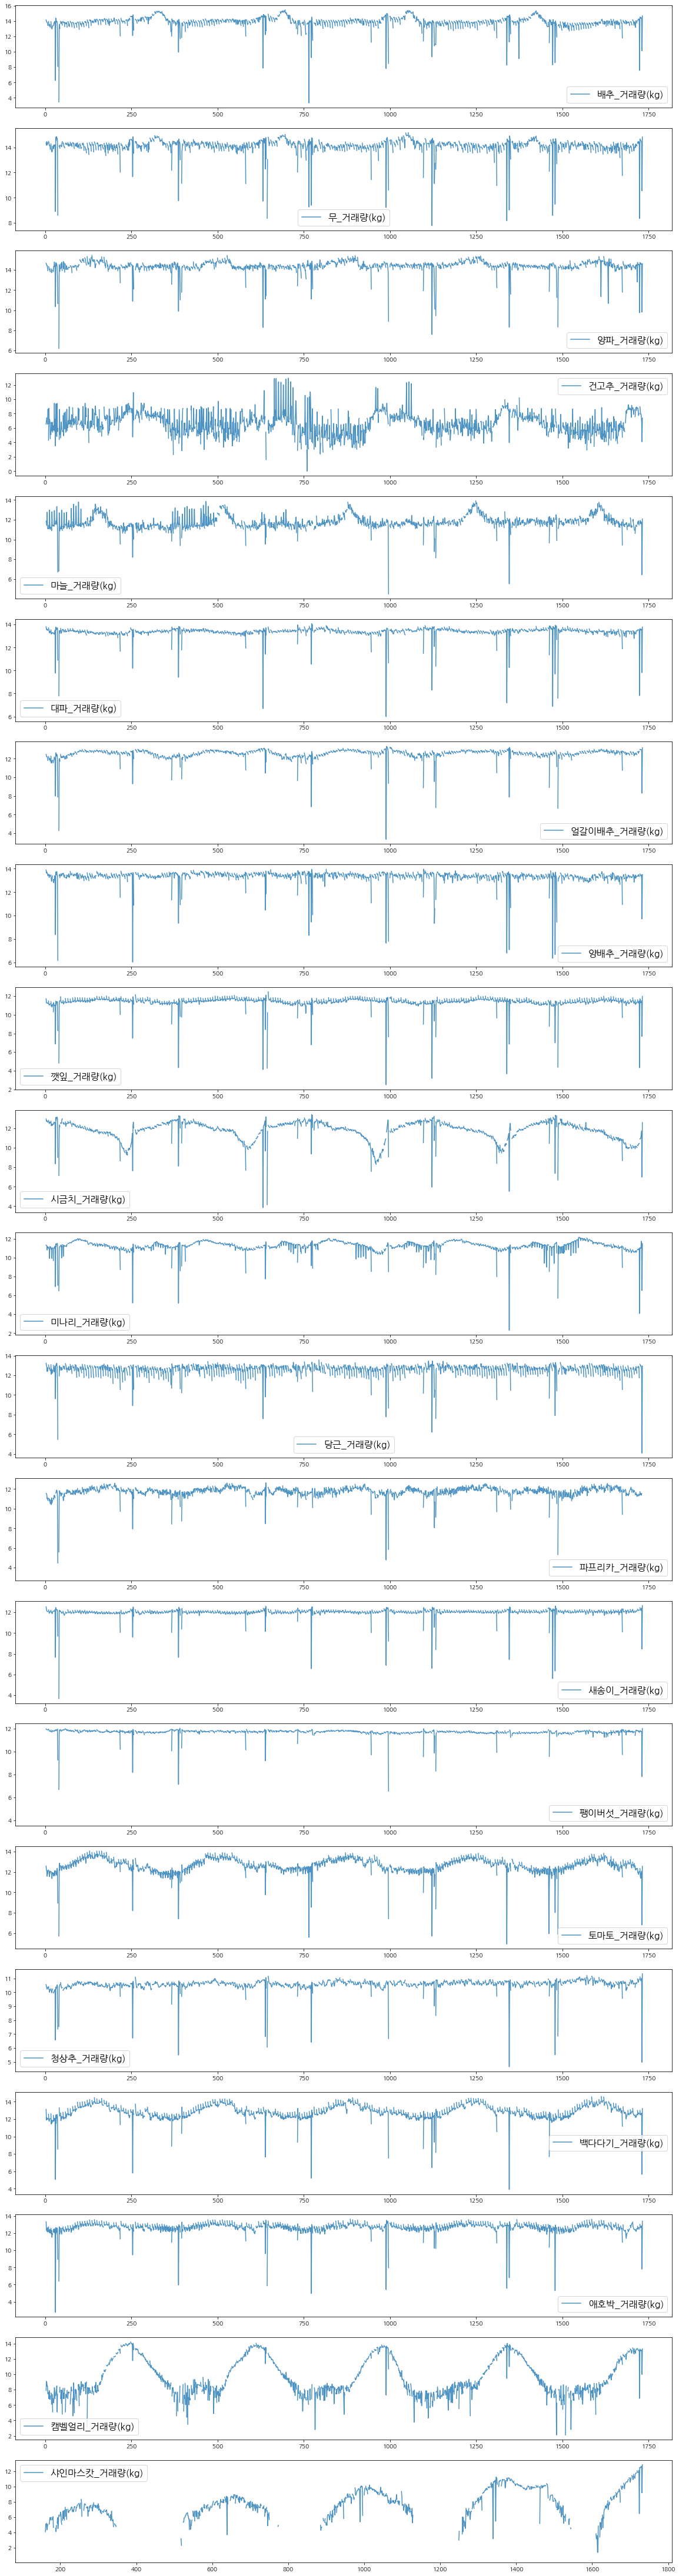

In [10]:
# 거래량만 plotting
fig,ax = plt.subplots(21,1,figsize=(20,80))
alpha = 0.8

n = 0
for i in range(21):
    
    ax[i].plot(np.log(train[str(col_list[n])].values), color = 'tab:blue',alpha = alpha)
#     ax[i].plot(np.log(train[str(col_list[n+1])].values), color = 'tab:red',alpha = alpha)
    ax[i].legend([str(col_list[n])])
    i += 1
    n += 2 

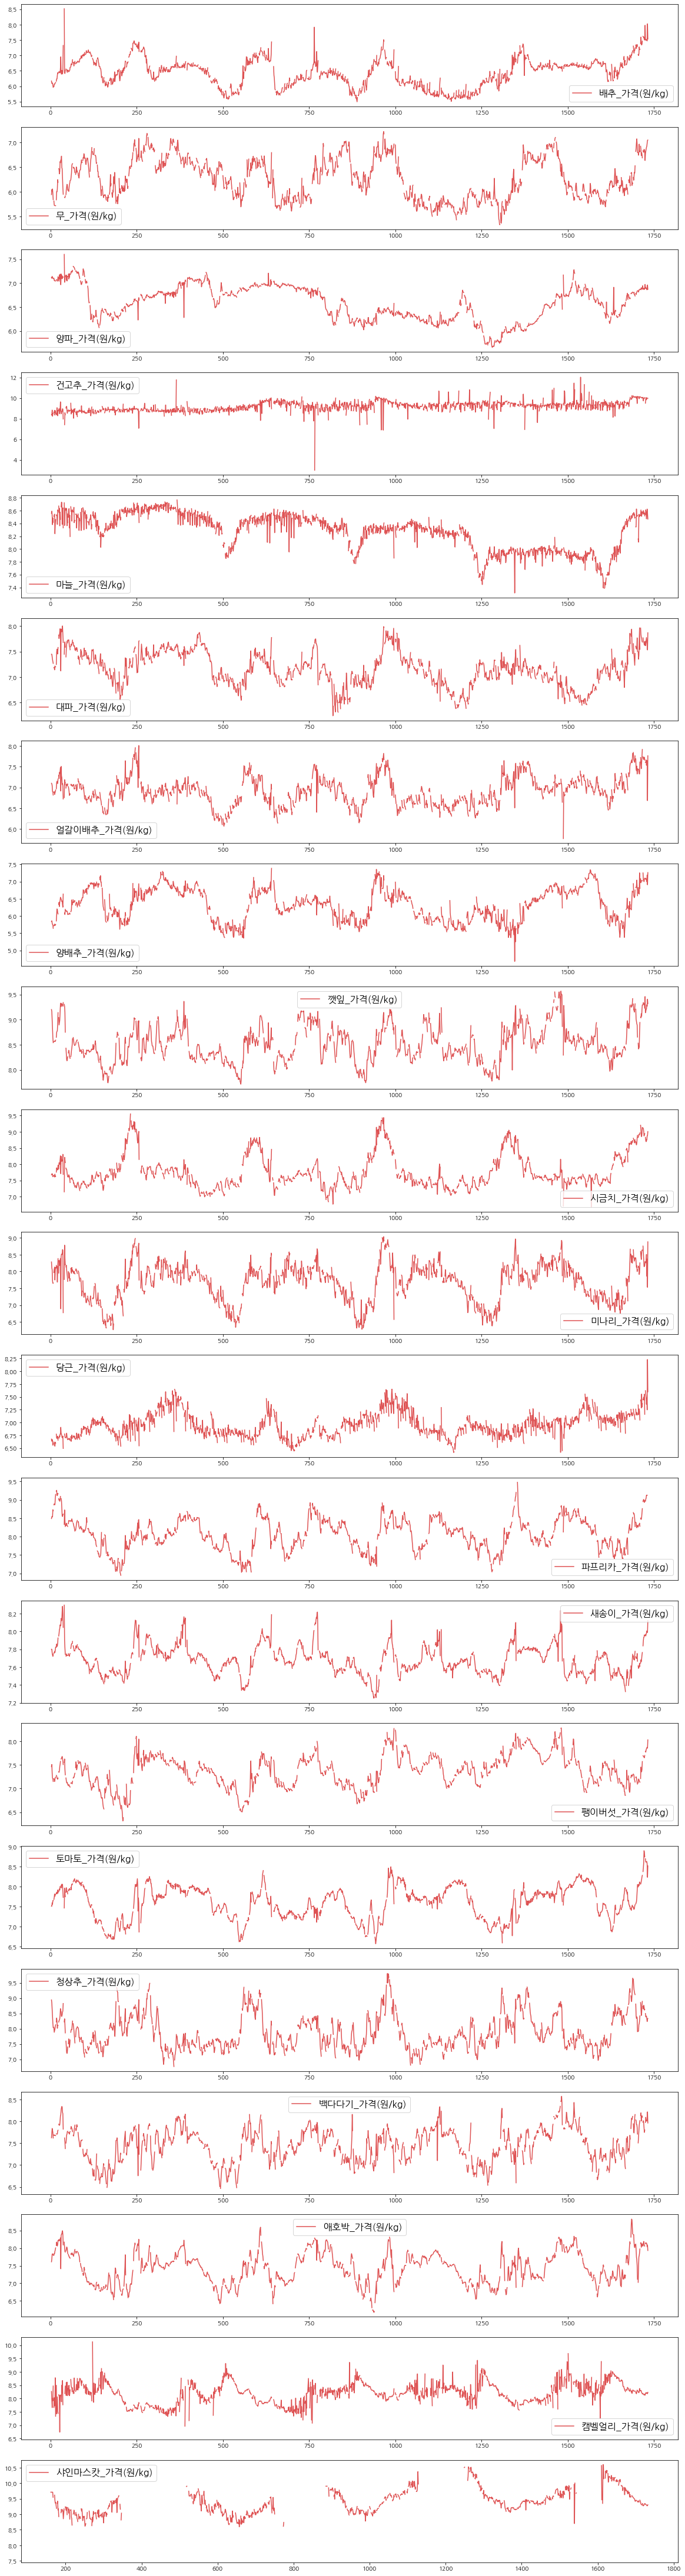

In [11]:
# 가격만 plotting
fig,ax = plt.subplots(21,1,figsize=(20,80))
alpha = 0.8

n = 0
for i in range(21):
    
#     ax[i].plot(np.log(train[str(col_list[n])].values), color = 'tab:blue',alpha = alpha)
    ax[i].plot(np.log(train[str(col_list[n+1])].values), color = 'tab:red',alpha = alpha)
    ax[i].legend([str(col_list[n+1])])
    i += 1
    n += 2 

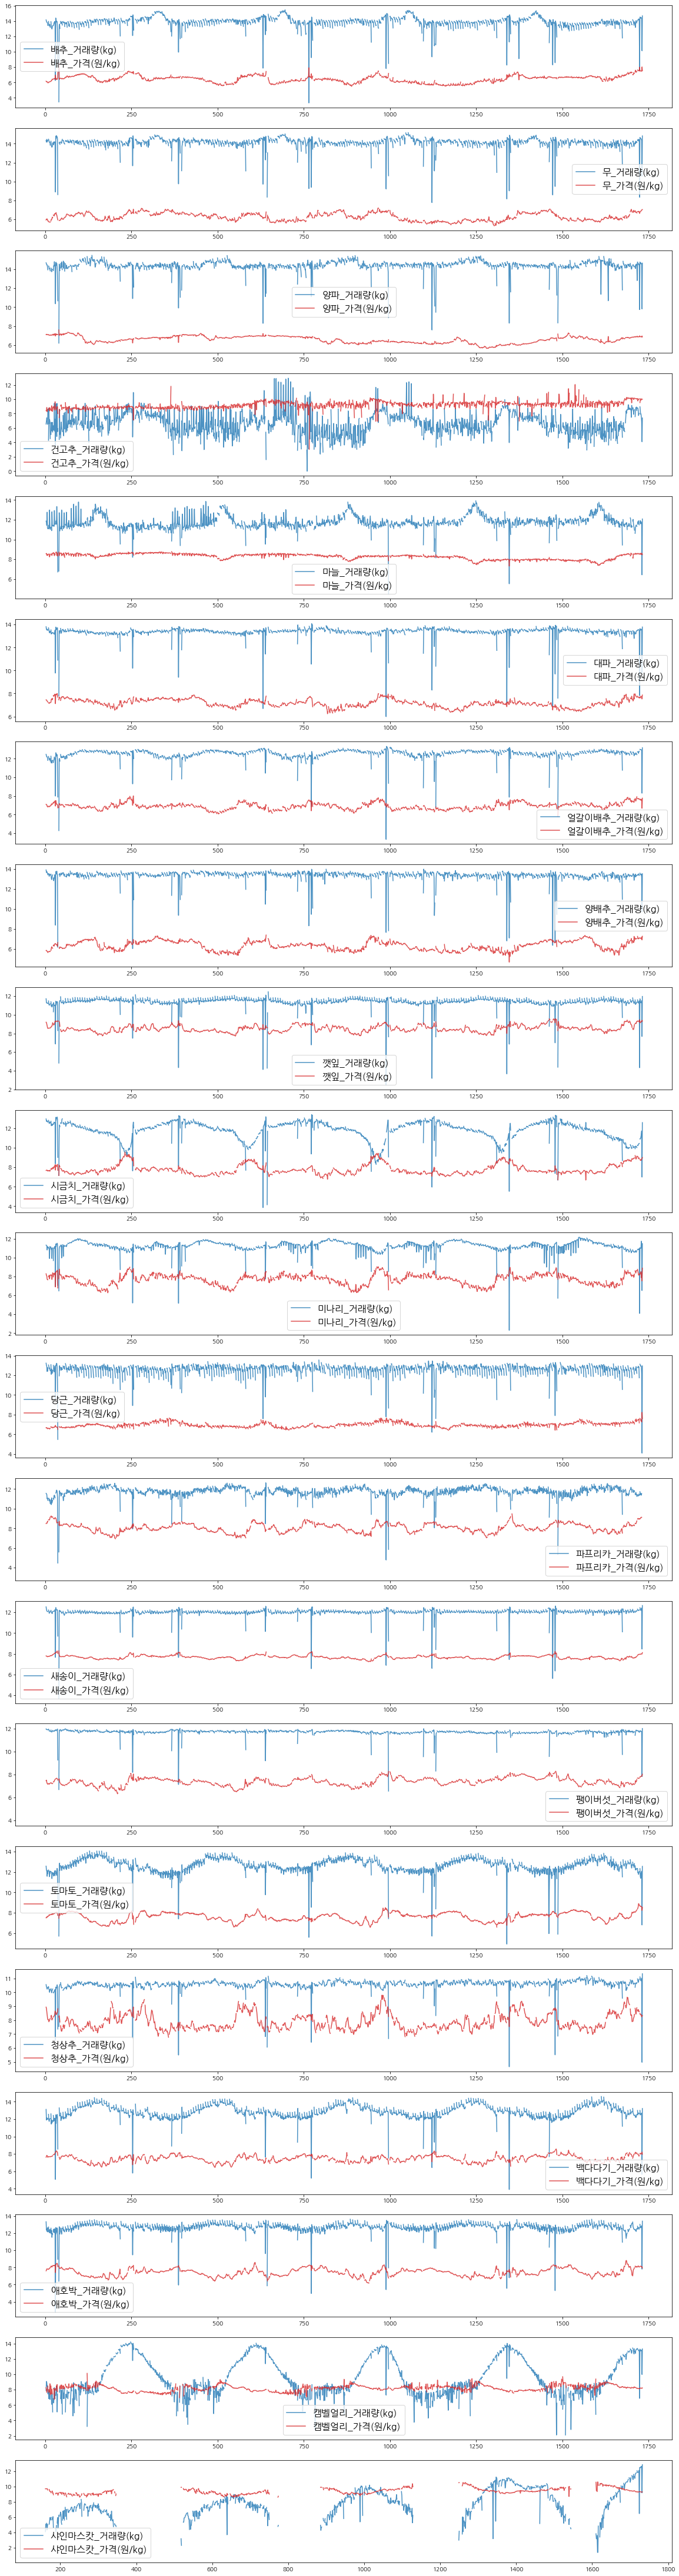

In [12]:
# 거래량과 가격에 log함수 적용
fig,ax = plt.subplots(21,1,figsize=(20,80))
alpha = 0.8

n = 0
for i in range(21):
    
    ax[i].plot(np.log(train[str(col_list[n])].values), color = 'tab:blue',alpha = alpha)
    ax[i].plot(np.log(train[str(col_list[n+1])].values), color = 'tab:red',alpha = alpha)
    ax[i].legend([str(col_list[n]), str(col_list[n+1])])
    i += 1
    n += 2 

### (2) 상관관계 분석

- 각 농산물의 거래량과 가격 상관계수 분석 결과
- 새송이 > 팽이 > 당근 > 대파 > 얼갈이배추 순으로 상관계수가 높았음 

In [13]:
# 거래량과 가격간의 상관관계 분석
n = 0
name_list = []
cor_list = []
for i in range(21):
    name_list.append(col_list[n][:2])
    cor_list.append(np.corrcoef(train[col_list[n]], train[col_list[n+1]])[0,1])
    n +=2 

In [14]:
corr_item = pd.DataFrame(data=cor_list, index=name_list)
corr_item.columns = ['상관계수']

In [15]:
corr_item.sort_values(by = '상관계수', ascending=False).T

새송        팽이        당근        대파        얼갈        양배        무_  \
상관계수  0.848623  0.650039  0.643431  0.631586  0.517757  0.494143  0.480175   

           깻잎        양파        청상  ...        배추       애호        파프        샤인  \
상관계수  0.39422  0.391037  0.298922  ...  0.252138  0.17951  0.176355  0.158609   

           토마        마늘       건고        백다        캠벨        시금  
상관계수  0.12301  0.087784  0.02461 -0.048449 -0.077108 -0.143463  

[1 rows x 21 columns]

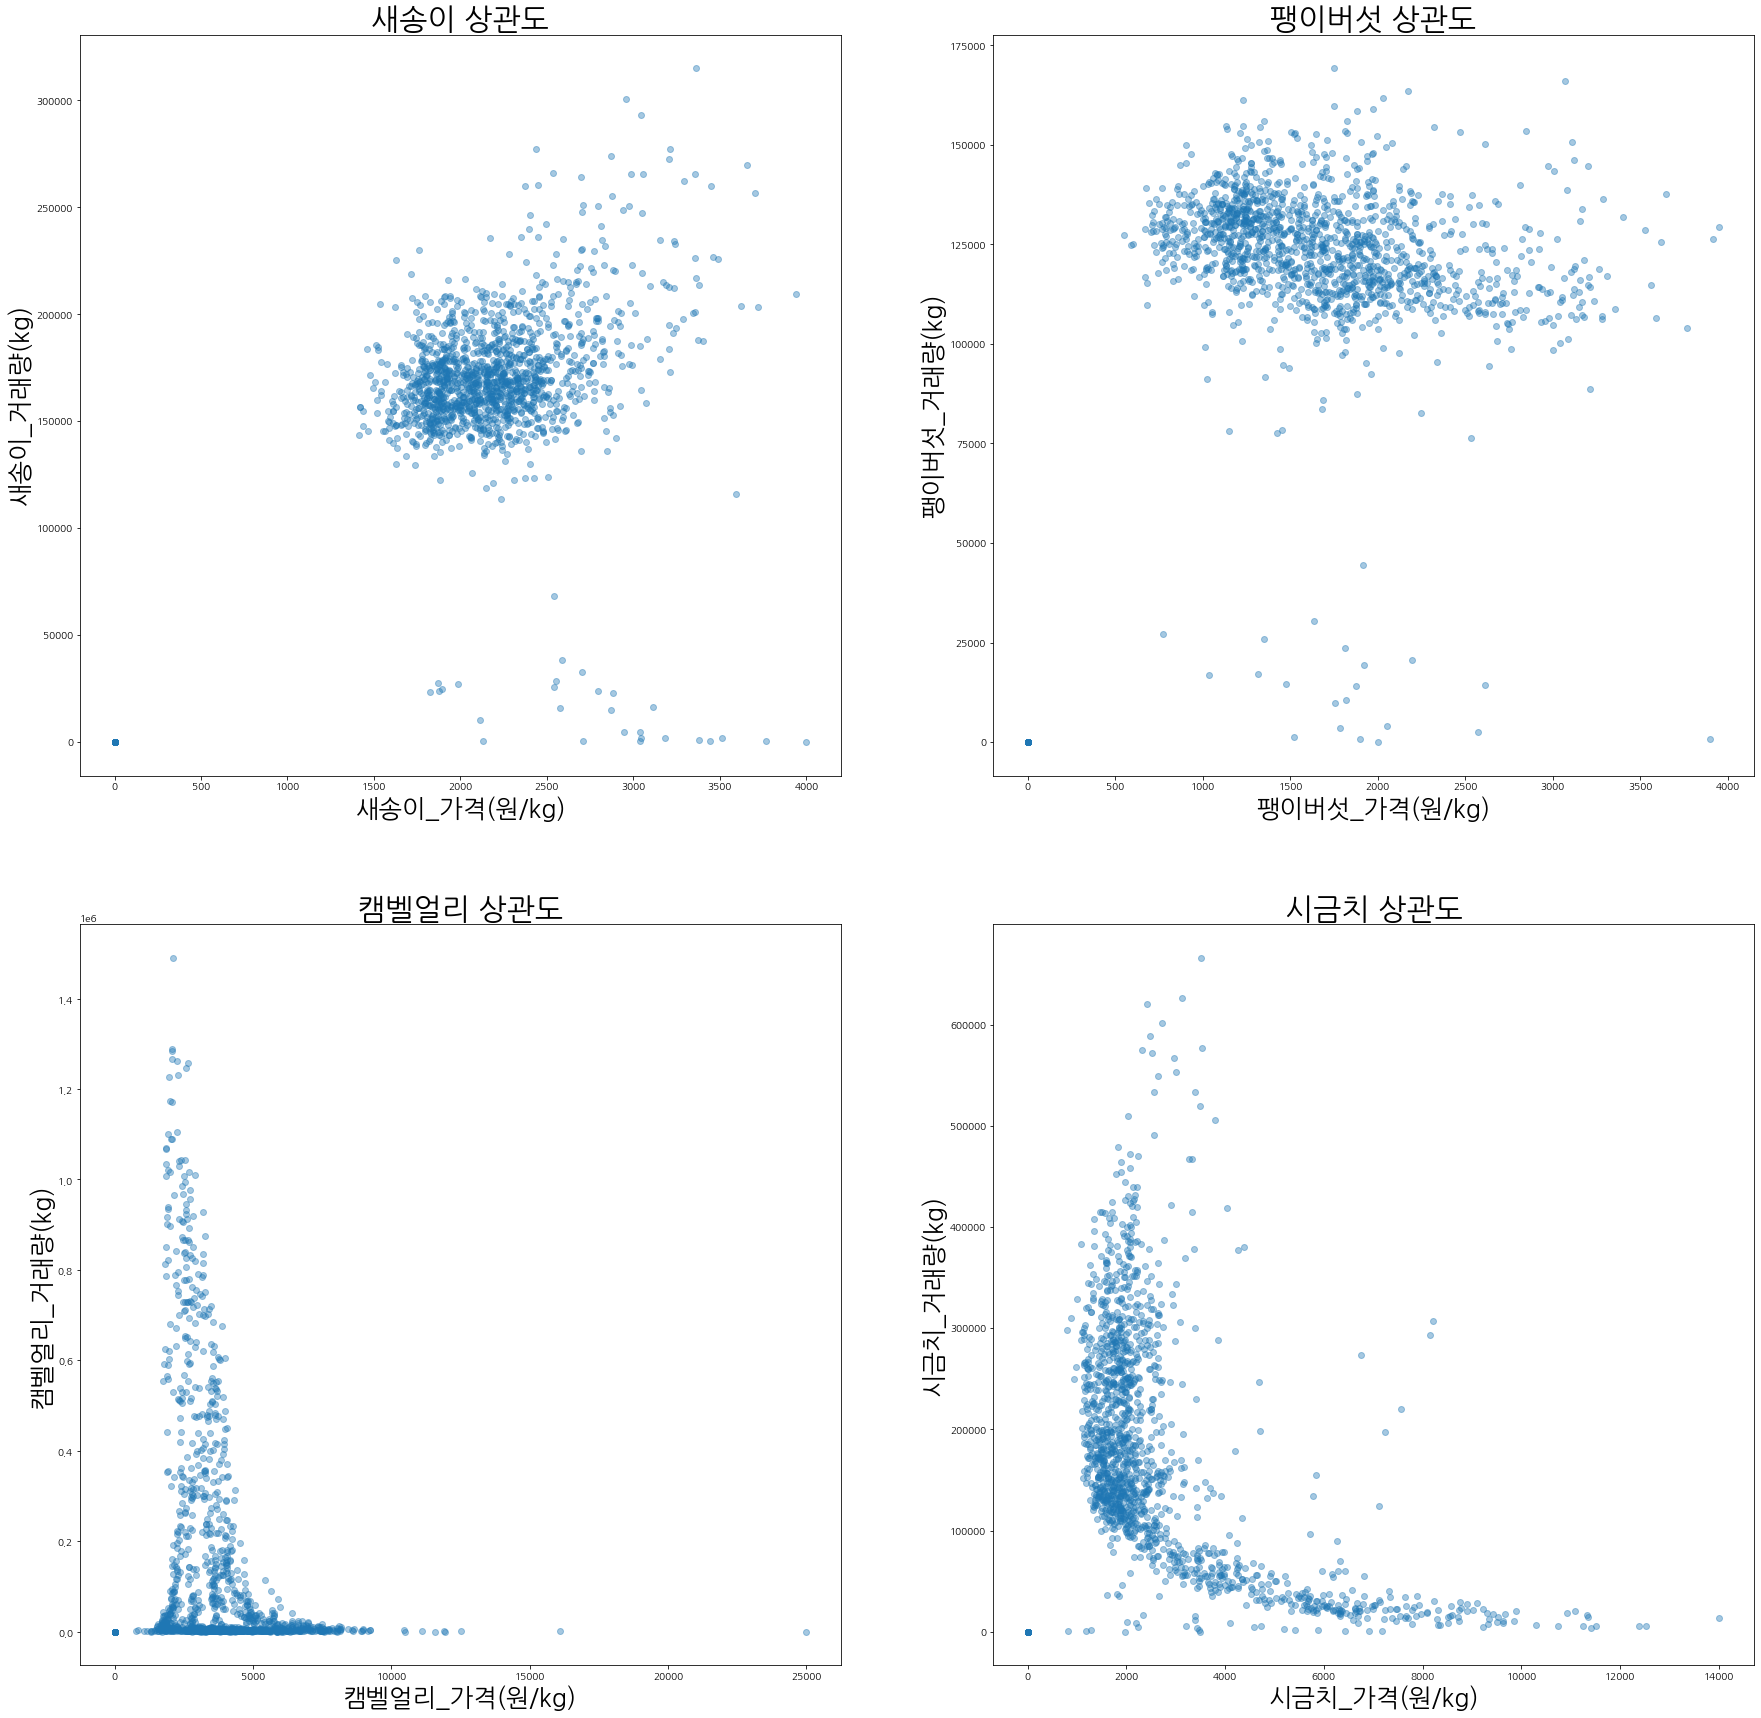

In [16]:
# 상관계수가 가장 높은 상위 2개 (새송이, 팽이버섯) 시각화
# 상관계수가 가장 낮은 하위 2개 (캠벨얼리, 시금치) 시각화
fig,ax = plt.subplots(2,2,figsize=(30,30))
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=30)

ax[0][0].scatter(train['새송이_가격(원/kg)'], train['새송이_거래량(kg)'], alpha = 0.4)
ax[0][0].set_xlabel('새송이_가격(원/kg)', )
ax[0][0].set_ylabel('새송이_거래량(kg)')
ax[0][0].set_title('새송이 상관도')

ax[0][1].scatter(train['팽이버섯_가격(원/kg)'], train['팽이버섯_거래량(kg)'], alpha = 0.4)
ax[0][1].set_xlabel('팽이버섯_가격(원/kg)', )
ax[0][1].set_ylabel('팽이버섯_거래량(kg)')
ax[0][1].set_title('팽이버섯 상관도')

ax[1][0].scatter(train['캠벨얼리_가격(원/kg)'], train['캠벨얼리_거래량(kg)'], alpha = 0.4)
ax[1][0].set_xlabel('캠벨얼리_가격(원/kg)', )
ax[1][0].set_ylabel('캠벨얼리_거래량(kg)')
ax[1][0].set_title('캠벨얼리 상관도')

ax[1][1].scatter(train['시금치_가격(원/kg)'], train['시금치_거래량(kg)'], alpha = 0.4)
ax[1][1].set_xlabel('시금치_가격(원/kg)', )
ax[1][1].set_ylabel('시금치_거래량(kg)')
ax[1][1].set_title('시금치 상관도')

plt.show()

### (3) 거래량이 없는 경우 확인

- 공휴일(1월 1일, 설날, 추석)은 거래량, 가격이 0으로 나타남(단, 간혹 거래가 이루어짐)
- 일요일에 거래량이 대부분 없지만 있는 경우도 있음 (설날, 추석이 포함된 주에는 거래가 이루어짐)
- 하지만 위 경우는 다른 요일에 비해 거래량 낮음

In [17]:
# 배추를 대표로 선택함
no_trade = train.loc[train['배추_거래량(kg)'] == 0]

In [18]:
# 설날 & 추석이 포함된 날짜
pd.DataFrame(no_trade.loc[no_trade['요일'] != '일요일']['date']).T

0           38          39          258         259         393   \
date  2016-01-01  2016-02-08  2016-02-09  2016-09-15  2016-09-16  2017-01-28   

            395         642         643         644   ...        998   \
date  2017-01-30  2017-10-04  2017-10-05  2017-10-06  ...  2018-09-25   

            999         1096        1131        1132        1351        1352  \
date  2018-09-26  2019-01-01  2019-02-05  2019-02-06  2019-09-13  2019-09-14   

            1461        1485        1487  
date  2020-01-01  2020-01-25  2020-01-27  

[1 rows x 24 columns]

In [19]:
# 일요일 거래량 보기
sun_trade = train.loc[train['요일'] == '일요일']

In [20]:
# 일요일인데 거래가 있는 경우 명절이 포함됨
sun_trade.loc[sun_trade['배추_거래량(kg)'] != 0]

date   요일  배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  무_가격(원/kg)  \
30    2016-01-31  일요일       528.0       1048.0     7352.0       767.0   
37    2016-02-07  일요일      3240.0       1517.0     5548.0       385.0   
254   2016-09-11  일요일    182976.0       1590.0   116490.0       858.0   
387   2017-01-22  일요일     21021.0        842.0    17330.0       659.0   
632   2017-09-24  일요일      2616.0       1378.0    16776.0       441.0   
639   2017-10-01  일요일    205787.0        981.0   216413.9       481.0   
765   2018-02-04  일요일        28.0       2750.0    10560.0       650.0   
772   2018-02-11  일요일     10284.0       1245.0    12105.0       621.0   
989   2018-09-16  일요일      2491.0        925.0    10139.0      1031.0   
996   2018-09-23  일요일      4831.0       1320.0    40724.0      1058.0   
1122  2019-01-27  일요일     11496.0        293.0     2396.0       251.0   
1129  2019-02-03  일요일     48215.0        453.0    67909.8       273.0   
1339  2019-09-01  일요일      3905.0       1110.0     3540.0       529.0   
1346  2019-09-08  일요일     79697.0       1219.0     8280.0       404.0   
1374  2019-10-06  일요일      9000.0        571.0        0.0         0.0   
1472  2020-01-12  일요일      4046.0        725.0     5400.0       931.0   
1479  2020-01-19  일요일      5330.9        731.0    13188.0       612.0   
1724  2020-09-20  일요일      1959.0       2925.0     4240.0       760.0   
1731  2020-09-27  일요일     25396.0       3066.0    38222.0      1139.0   

      양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  ...  청상추_거래량(kg)  \
30       31360.0       1061.0         33.6        7333.0  ...        716.0   
37       42527.5       1244.0        375.0        2981.0  ...       1572.0   
254      53910.0        508.0        116.0        7931.0  ...        820.0   
387      20000.0        535.0          0.0           0.0  ...        242.0   
632       4000.0       1350.0          0.0           0.0  ...          0.0   
639      66370.0       1180.0          0.0           0.0  ...        912.0   
765          0.0          0.0          0.0           0.0  ...          0.0   
772      66495.0        860.0          0.0           0.0  ...        608.0   
989          0.0          0.0          0.0           0.0  ...          0.0   
996       7320.0        719.0          0.0           0.0  ...        792.0   
1122      2000.0        500.0          0.0           0.0  ...          0.0   
1129    152293.0        498.0          0.0           0.0  ...       8284.0   
1339         0.0          0.0          0.0           0.0  ...          0.0   
1346      4080.0        400.0         52.8        9773.0  ...        104.0   
1374         0.0          0.0          0.0           0.0  ...          0.0   
1472         0.0          0.0          0.0           0.0  ...          0.0   
1479         0.0          0.0          0.0           0.0  ...        246.0   
1724     17000.0       1068.0          0.0           0.0  ...          0.0   
1731     18240.0       1056.0         60.0       22333.0  ...        144.0   

      청상추_가격(원/kg)  백다다기_거래량(kg)  백다다기_가격(원/kg)  애호박_거래량(kg)  애호박_가격(원/kg)  \
30          5404.0         160.0         3474.0         16.0        1656.0   
37          6794.0        5225.0         2496.0       7777.0        3260.0   
254         4961.0         330.0          858.0      12972.0        3210.0   
387         1417.0           0.0            0.0        384.0        3727.0   
632            0.0           0.0            0.0          0.0           0.0   
639         2394.0        2085.0         1164.0      14964.0        1262.0   
765            0.0           0.0            0.0          0.0           0.0   
772         2968.0         185.0         2278.0        144.0        2110.0   
989            0.0           0.0            0.0        224.0        2846.0   
996         3872.0        1879.0          921.0       2859.0         866.0   
1122           0.0         620.0         1213.0          0.0           0.0   
1129        2119.0       11530.0         4165.0      2

In [21]:
# idx 989, 996 일요일에 거래가 이루어졌지만, 평소보다 매우 낮은 거래량을 보임 
train.iloc[988:1000]

date   요일  배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  무_가격(원/kg)  \
988  2018-09-15  토요일   2208871.0        772.0  1877321.0       900.0   
989  2018-09-16  일요일      2491.0        925.0    10139.0      1031.0   
990  2018-09-17  월요일   3105298.4        713.0  2403555.0       896.0   
991  2018-09-18  화요일   3248799.6        722.0  2406904.8       847.0   
992  2018-09-19  수요일   3199951.4        764.0  2651235.4       865.0   
993  2018-09-20  목요일   3105505.5        731.0  2229270.5       945.0   
994  2018-09-21  금요일   1941894.5        731.0  1943805.0       977.0   
995  2018-09-22  토요일    684337.5        907.0  1315966.8       981.0   
996  2018-09-23  일요일      4831.0       1320.0    40724.0      1058.0   
997  2018-09-24  월요일         0.0          0.0        0.0         0.0   
998  2018-09-25  화요일         0.0          0.0        0.0         0.0   
999  2018-09-26  수요일         0.0          0.0        0.0         0.0   

     양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  ...  청상추_거래량(kg)  \
988   1550994.0        611.0       2628.4       13842.0  ...      43649.7   
989         0.0          0.0          0.0           0.0  ...          0.0   
990   2326815.8        616.0       4067.2       14874.0  ...      49977.0   
991   2049992.6        590.0      12638.8        9269.0  ...      44578.7   
992   2321204.0        566.0       3623.2       14190.0  ...      40895.9   
993   1902381.9        574.0       1920.0       13521.0  ...      38781.5   
994   1540936.5        589.0       1672.0       15291.0  ...      47213.1   
995    891112.0        551.0        707.2       13937.0  ...      46839.4   
996      7320.0        719.0          0.0           0.0  ...        792.0   
997         0.0          0.0          0.0           0.0  ...          0.0   
998         0.0          0.0          0.0           0.0  ...          0.0   
999         0.0          0.0          0.0           0.0  ...          0.0   

     청상추_가격(원/kg)  백다다기_거래량(kg)  백다다기_가격(원/kg)  애호박_거래량(kg)  애호박_가격(원/kg)  \
988        8234.0      405612.0         1880.0     456736.0        2277.0   
989           0.0           0.0            0.0        224.0        2846.0   
990        5960.0      656335.0         1675.0     735526.0        1921.0   
991        4797.0      411360.0         1610.0     502288.4        1671.0   
992        5436.0      387355.0         1629.0     524049.0        1852.0   
993        7666.0      403757.0         1742.0     567948.3        1801.0   
994        7805.0      409527.5         1492.0     659202.0        1199.0   
995        6720.0      350574.0         1339.0     447468.0         962.0   
996        3872.0        1879.0          921.0       2859.0         866.0   
997           0.0           0.0            0.0          0.0           0.0   
998           0.0           0.0            0.0          0.0           0.0   
999           0.0           0.0            0.0          0.0           0.0   

     캠벨얼리_거래량(kg)  캠벨얼리_가격(원/kg)  샤인마스캇_거래량(kg)  샤인마스캇_가격(원/kg)  
988      714230.5         3216.0        12821.0          8309.0  
989        1485.0         3263.0          216.0          6500.0  
990      875290.0         3257.0        20644.0          8523.0  
991      700498.0         3209.0        19494.0          8791.0  
992      751829.0         3268.0        23981.0          8081.0  
993      702931.6         3361.0        21285.0          7781.0  
994      713636.0         3431.0        23036.0          7770.0  
995      635244.0         3484.0        19734.0          8456.0  
996       44600.0         4289.0          503.0          9350.0  
997           0.0            0.0            0.0             0.0  
998           0.0            0.0            0.0             0.0  
999           0.0            0.0            0.0             0.0  

[12 rows x 44 columns]